In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [ ]:
data=pd.read_csv('/content/s.csv')

In [ ]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
data.shape

(1000, 8)

In [ ]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
gender_count=data['gender'].value_counts()

In [ ]:
gender_count

,count
gender,
female,518
male,482


In [ ]:
count_race=data['race/ethnicity'].value_counts()

In [ ]:
count_race

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [ ]:
count_level=data['parental level of education'].value_counts()

In [ ]:
count_level

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


#Analysis Math Score

In [ ]:
max_score = data['math score'].max()
min_score = data['math score'].min()
print(f'Maximum math score: {max_score}')
print(f'Minimum math score: {min_score}')

Maximum math score: 100
Minimum math score: 0


In [ ]:
count_math=data['math score'].value_counts()

In [ ]:
count_math

,count
math score,
65,36
62,35
69,32
59,32
73,27
...,...
24,1
26,1
19,1


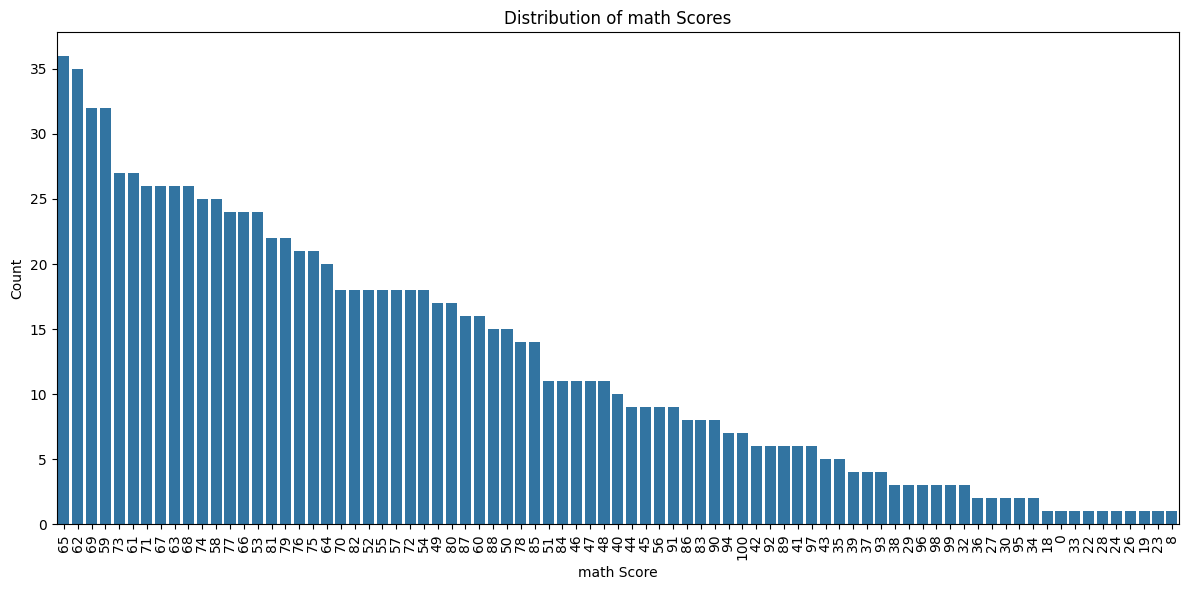

In [ ]:
#Distribution of math Scores
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='math score', order=data['math score'].value_counts().index)
plt.title('Distribution of math Scores')
plt.xlabel('math Score')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#calculate the mean for math score for each class

mean_score_math = data['math score'].mean()
mean_score_read = data['reading score'].mean()
mean_score_write = data['writing score'].mean()
print(f'Mean math score: {mean_score_math}')
print(f'Mean reading score: {mean_score_read}')
print(f'Mean writing score: {mean_score_write}')


Mean math score: 66.089
Mean reading score: 69.169
Mean writing score: 68.054


In [ ]:

#find the total number of sutent for ( exllent-very good - g00d -pass ) grade
Excellent_grade= data[data['math score'] >= 90].shape[0]
verygood_grade= data[(data['math score'] >= 80) & (data['math score'] < 90)].shape[0]
good_grade= data[(data['math score'] >= 70) & (data['math score'] < 80)].shape[0]
pass_grade= data[(data['math score'] >= 60) & (data['math score'] < 70)].shape[0]

print(f"Number of students with math score >= 90: {Excellent_grade}")
print(f"Number of students with math score >= 80 and < 90: {verygood_grade}")
print(f"Number of students with math score >= 70 and < 80: {good_grade}")
print(f"Number of students with math score >= 60 and < 70: {pass_grade}")

Number of students with math score >= 90: 58
Number of students with math score >= 80 and < 90: 135
Number of students with math score >= 70 and < 80: 216
Number of students with math score >= 60 and < 70: 268


In [ ]:
pass_s = data[(data['math score'] >= 60) & (data['math score'] < 70)].groupby('race/ethnicity').size().reset_index(name='count')
print("Number of students with math score that pass")
print(pass_s)

Number of students with math score that pass
  race/ethnicity  count
0        group A     22
1        group B     54
2        group C     95
3        group D     72
4        group E     25


In [ ]:
good = data[(data['math score'] >= 70) & (data['math score'] < 80)].groupby('race/ethnicity').size().reset_index(name='count')
print("Number of students with math score good")
print(good)

Number of students with math score good
  race/ethnicity  count
0        group A     16
1        group B     36
2        group C     62
3        group D     67
4        group E     35


In [ ]:
very_good = data[(data['math score'] >= 80) & (data['math score'] < 90)].groupby('race/ethnicity').size().reset_index(name='count')
print("Number of students with math score very good")
print(very_good)

Number of students with math score very good
  race/ethnicity  count
0        group A      5
1        group B     21
2        group C     33
3        group D     43
4        group E     33


In [ ]:
exllent = data[(data['math score'] >= 90) ].groupby('race/ethnicity').size().reset_index(name='count')
print("Number of students with math score exllent")
print(exllent)

Number of students with math score exllent
  race/ethnicity  count
0        group A      4
1        group B      8
2        group C     16
3        group D      8
4        group E     22


# Analysis Reading Score

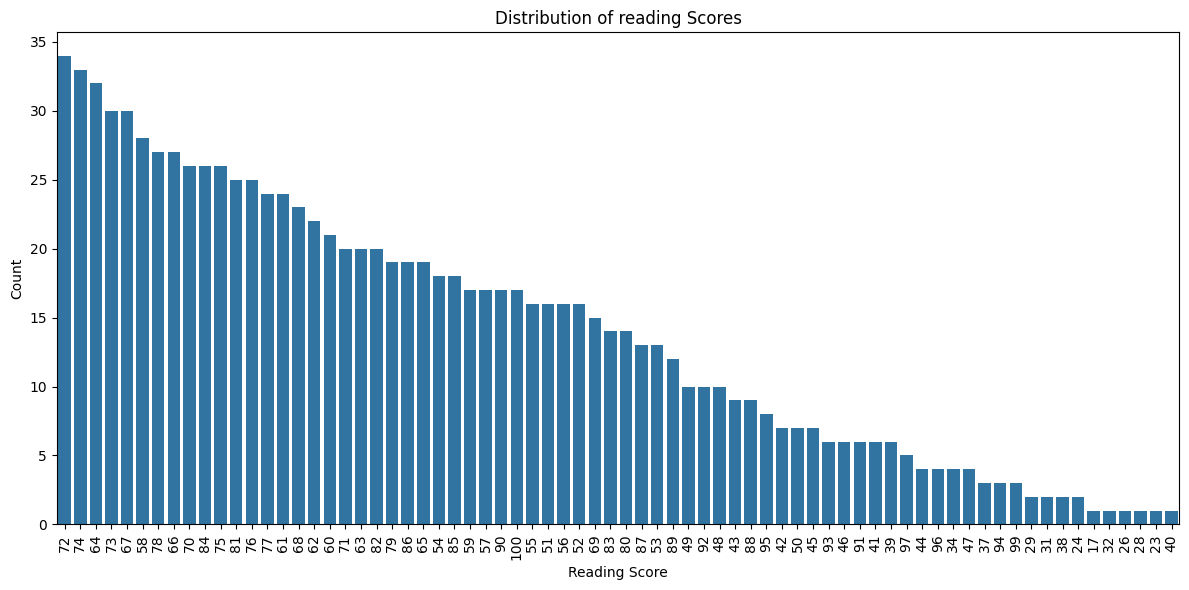

In [ ]:
#Distribution of reading Scores
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='reading score', order=data['reading score'].value_counts().index)
plt.title('Distribution of reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

#find the total number of sutent for ( exllent-very good - g00d -pass ) grade for reading
Excellent_grade_reading= data[data['reading score'] >= 90].shape[0]
verygood_grade_reading= data[(data['reading score'] >= 80) & (data['reading score'] < 90)].shape[0]
good_grade_reading= data[(data['reading score'] >= 70) & (data['reading score'] < 80)].shape[0]
pass_grade_reading= data[(data['reading score'] >= 60) & (data['reading score'] < 70)].shape[0]

print(f"Number of students with reading score >= 90: {Excellent_grade_reading}")
print(f"Number of students with reading score >= 80 and < 90: {verygood_grade_reading}")
print(f"Number of students with reading score >= 70 and < 80: {good_grade_reading}")
print(f"Number of students with reading score >= 60 and < 70: {pass_grade_reading}")

Number of students with reading score >= 90: 79
Number of students with reading score >= 80 and < 90: 170
Number of students with reading score >= 70 and < 80: 264
Number of students with reading score >= 60 and < 70: 233


In [ ]:
pass_s_r = data[(data['reading score'] >= 60) & (data['reading score'] < 70)].groupby('race/ethnicity').size().reset_index(name='count')
print("Number of students with reading score that pass")
print(pass_s_r)

Number of students with reading score that pass
  race/ethnicity  count
0        group A     21
1        group B     50
2        group C     81
3        group D     57
4        group E     24


In [ ]:
good_r= data[(data['reading score'] >= 70) & (data['reading score'] < 80)].groupby('race/ethnicity').size().reset_index(name='count')
print("Number of students with reading score good")
print(good_r)

Number of students with reading score good
  race/ethnicity  count
0        group A     15
1        group B     37
2        group C     90
3        group D     80
4        group E     42


In [ ]:
very_good_r = data[(data['reading score'] >= 80) & (data['reading score'] < 90)].groupby('race/ethnicity').size().reset_index(name='count')
print("Number of students with reading score very good")
print(very_good_r)

Number of students with reading score very good
  race/ethnicity  count
0        group A     12
1        group B     36
2        group C     51
3        group D     42
4        group E     29


In [ ]:
exllent_r = data[(data['reading score'] >= 90) ].groupby('race/ethnicity').size().reset_index(name='count')
print("Number of students with reading score exllent")
print(exllent_r)

Number of students with reading score exllent
  race/ethnicity  count
0        group A      6
1        group B     12
2        group C     22
3        group D     21
4        group E     18


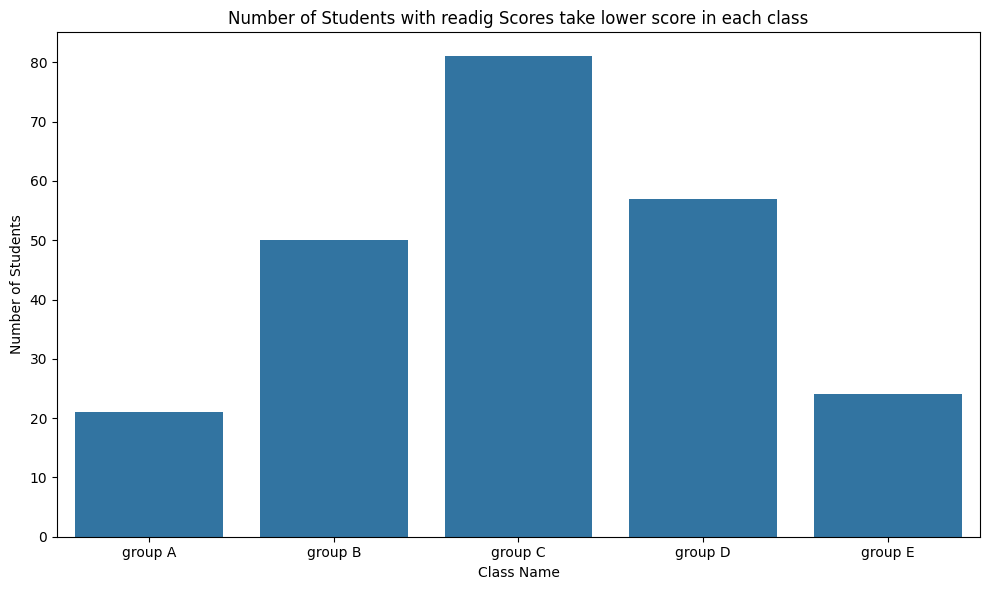

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pass_s_r, x='race/ethnicity', y='count')
plt.title('Number of Students with readig Scores take lower score in each class')
plt.xlabel('Class Name')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

#Analysis Writing score

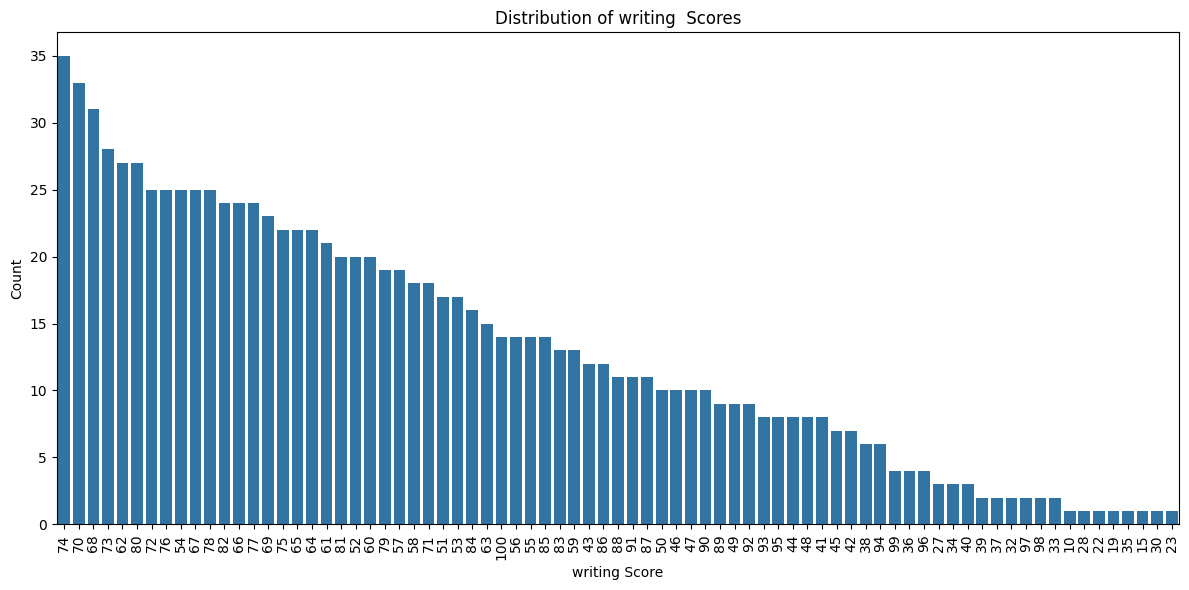

In [ ]:
#Distribution of writing  Scores
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='writing score', order=data['writing score'].value_counts().index)# countplot that used to count all value
plt.title('Distribution of writing  Scores')
plt.xlabel('writing Score')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

#find the total number of sutent for ( exllent-very good - g00d -pass ) grade for writing
Excellent_grade_writing= data[data['writing score'] >= 90].shape[0]
verygood_grade_writing= data[(data['writing score'] >= 80) & (data['writing score'] < 90)].shape[0]
good_grade_writing= data[(data['writing score'] >= 70) & (data['writing score'] < 80)].shape[0]
pass_grade_writing= data[(data['writing score'] >= 60) & (data['writing score'] < 70)].shape[0]

print(f"Number of students with writing score >= 90: {Excellent_grade_writing}")
print(f"Number of students with writing score >= 80 and < 90: {verygood_grade_writing}")
print(f"Number of students with writing score >= 70 and < 80: {good_grade_writing}")
print(f"Number of students with writing score >= 60 and < 70: {pass_grade_writing}")

Number of students with writing score >= 90: 78
Number of students with writing score >= 80 and < 90: 157
Number of students with writing score >= 70 and < 80: 254
Number of students with writing score >= 60 and < 70: 230


In [ ]:
pass_s_w = data[(data['writing score'] >= 60) & (data['writing score'] < 70)].groupby('race/ethnicity').size().reset_index(name='count')
print("Number of students with writing score that pass")
print(pass_s_w)

Number of students with writing score that pass
  race/ethnicity  count
0        group A     24
1        group B     48
2        group C     73
3        group D     60
4        group E     25


In [ ]:
good_w= data[(data['writing score'] >= 70) & (data['writing score'] < 80)].groupby('race/ethnicity').size().reset_index(name='count')
print("Number of students with writng score good")
print(good_w)

Number of students with writng score good
  race/ethnicity  count
0        group A     13
1        group B     43
2        group C     77
3        group D     76
4        group E     45


In [ ]:
very_good_w = data[(data['writing score'] >= 80) & (data['reading score'] < 90)].groupby('race/ethnicity').size().reset_index(name='count')
print("Number of students with writing score very good")
print(very_good_w)

Number of students with writing score very good
  race/ethnicity  count
0        group A      9
1        group B     26
2        group C     53
3        group D     46
4        group E     22


In [ ]:
exllent_w = data[(data['writing score'] >= 90) ].groupby('race/ethnicity').size().reset_index(name='count')
print("Number of students with writing score exllent")
print(exllent_w)

Number of students with writing score exllent
  race/ethnicity  count
0        group A      5
1        group B      9
2        group C     26
3        group D     20
4        group E     18


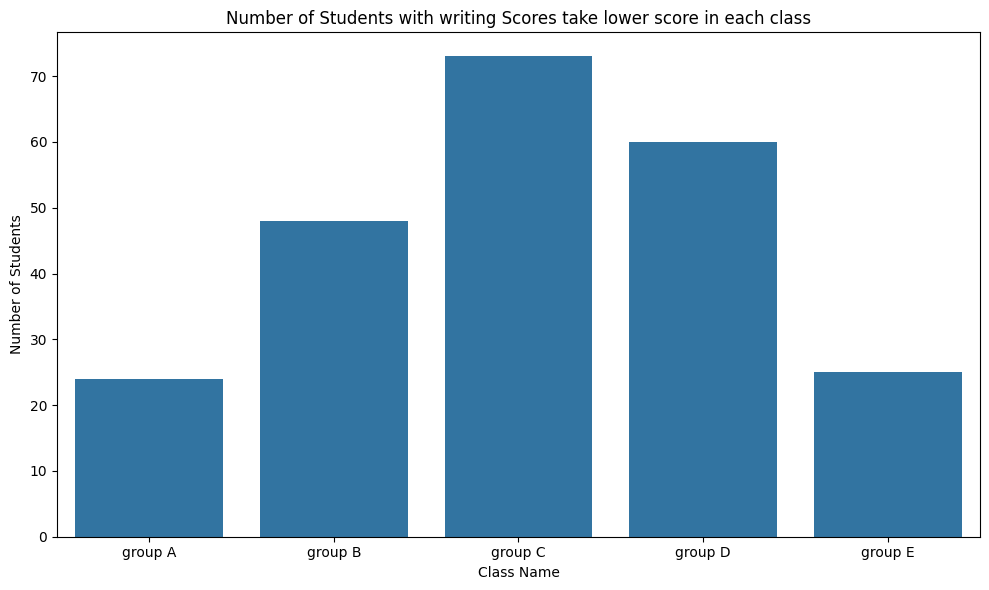

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pass_s_w, x='race/ethnicity', y='count')
plt.title('Number of Students with writing Scores take lower score in each class')
plt.xlabel('Class Name')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

# Task
Compare the number of students with excellent scores (over 90) in math, reading, and writing for each race/ethnicity group using a grouped bar plot.

## Prepare data for plotting

### Subtask:
Combine the dataframes containing the counts of excellent scores for math, reading, and writing by race/ethnicity into a single dataframe suitable for plotting.


**Reasoning**:
Rename the count columns in the individual subject dataframes and then merge them to prepare for melting.



In [ ]:
exllent_renamed = exllent.rename(columns={'count': 'math_count'})
exllent_r_renamed = exllent_r.rename(columns={'count': 'reading_count'})
exllent_w_renamed = exllent_w.rename(columns={'count': 'writing_count'})

merged_excellent_scores = pd.merge(exllent_renamed, exllent_r_renamed, on='race/ethnicity')
merged_excellent_scores = pd.merge(merged_excellent_scores, exllent_w_renamed, on='race/ethnicity')

excellent_scores_melted = pd.melt(merged_excellent_scores,
                                  id_vars=['race/ethnicity'],
                                  value_vars=['math_count', 'reading_count', 'writing_count'],
                                  var_name='Subject',
                                  value_name='Count')
excellent_scores_melted['Subject'] = excellent_scores_melted['Subject'].str.replace('_count', '').str.capitalize()
display(excellent_scores_melted)

,race/ethnicity,Subject,Count
0,group A,Math,4
1,group B,Math,8
2,group C,Math,16
3,group D,Math,8
4,group E,Math,22
5,group A,Reading,6
6,group B,Reading,12
7,group C,Reading,22
8,group D,Reading,21
9,group E,Reading,18


## Create a grouped bar plot

### Subtask:
Generate a grouped bar plot to visualize the number of students with excellent scores for each subject within each race/ethnicity group.


**Reasoning**:
Generate a grouped bar plot to visualize the number of students with excellent scores for each subject within each race/ethnicity group.



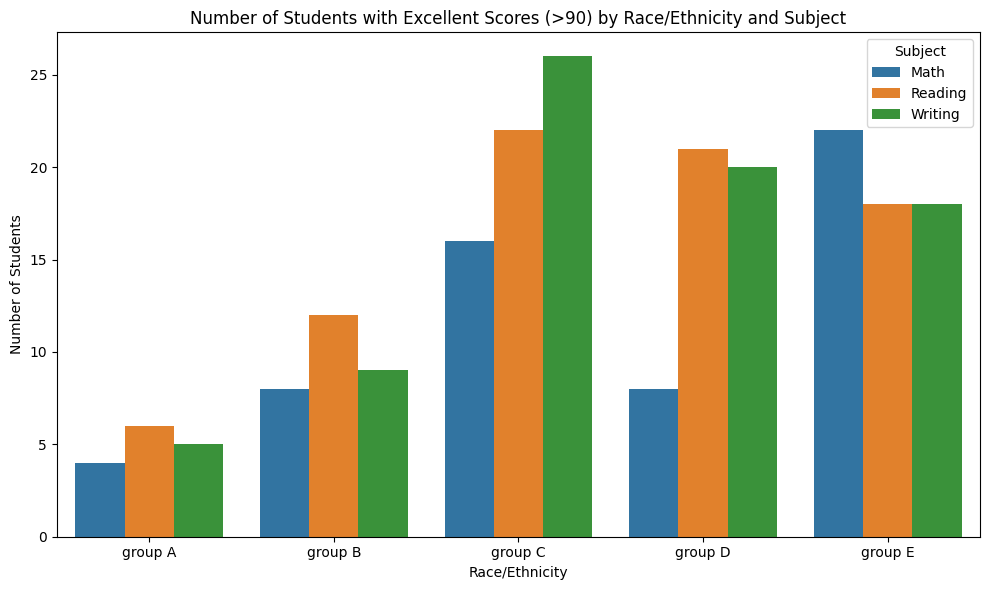

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=excellent_scores_melted, x='race/ethnicity', y='Count', hue='Subject')
plt.title('Number of Students with Excellent Scores (>90) by Race/Ethnicity and Subject')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()